# Yanux Calculator

## Imports

In [13]:
import numpy as np
from scipy import stats
import statsmodels.stats.proportion as smp
import pandas as pd
import matplotlib.pyplot as plt

## Helper Functions

In [25]:
def print_stats(data, hist_bins=10, hist_size=(8,4)):
    print('--- Statistics ----')
    display(data.describe())
    print('\n')
    print('--- Counting Unique Values ----')
    display(data.value_counts())
    print('\n')
    print('--- Basic Histogram ----')
    data.hist(bins=hist_bins, figsize=hist_size)
    plt.show()
    
def calculate_sus(data):
    for i in range(len(data.columns)):
        if i % 2:
            data.iloc[:,i] = 7 - data.iloc[:,i]
        else:
            data.iloc[:,i] = data.iloc[:,i] - 1

    data['Score'] = data.iloc[:,0:10].sum(axis=1)
    data['Score 100'] = data['Score'] * (100/60)
    return data

def confidence_interval_t(data, confidence_level=0.95):
    return stats.t.interval(confidence_level, data.count()-1, data.mean(), data.sem())
    

## Load Excel

In [26]:
data = pd.read_excel('data/userstudies/yanux-calculator-questionnaire-responses.xlsx', sheet_name=None)  

In [27]:
data_basic = data['Basic']
#display(data_basic)

### Age

--- Statistics ----


count    13.000000
mean     31.846154
std      13.309434
min      20.000000
25%      22.000000
50%      24.000000
75%      37.000000
max      60.000000
Name: Age, dtype: float64



--- Counting Unique Values ----


22    2
23    2
34    1
60    1
49    1
20    1
29    1
37    1
21    1
50    1
24    1
Name: Age, dtype: int64



--- Basic Histogram ----


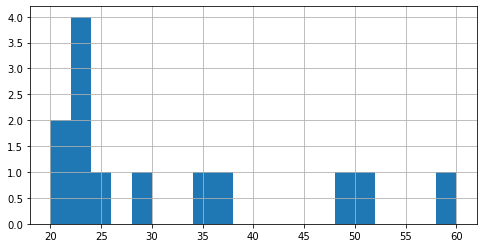

Population Standard Deviation:
12.787290287602307


In [28]:
data_basic_age = data_basic['Age']
print_stats(data_basic_age, hist_bins=20)
print('Population Standard Deviation:')
print(data_basic_age.std(ddof=0))

### Gender

--- Statistics ----


count       13
unique       2
top       Male
freq         8
Name: Genre, dtype: object



--- Counting Unique Values ----


Male      8
Female    5
Name: Genre, dtype: int64



--- Basic Histogram ----


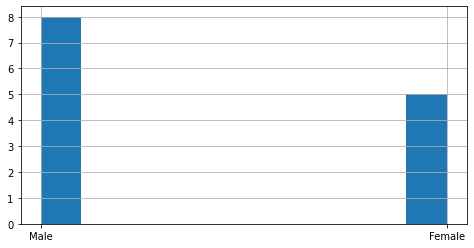

In [29]:
#TODO: This should be Gender. I don't know why I called "Genre"
data_basic_genre = data_basic['Genre']
print_stats(data_basic_genre)

### Education

--- Statistics ----


count                      13
unique                      5
top       Secondary Education
freq                        4
Name: Education, dtype: object



--- Counting Unique Values ----


Secondary Education         4
Bachelor's Degree           4
Doctoral Degree             3
Master's Degree             1
Post-Secondary Education    1
Name: Education, dtype: int64



--- Basic Histogram ----


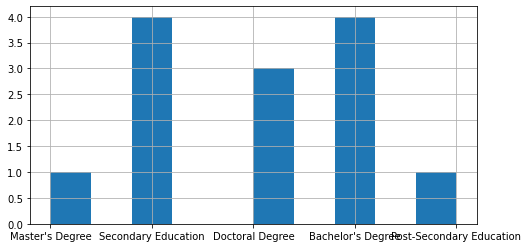

In [30]:
data_basic_education = data_basic['Education']
print_stats(data_basic_education)

### Type of Devices

In [31]:
data_basic_type_of_devices = data_basic['Type of Devices'].map(lambda x: [i.strip() for i in x.split(",")])
print('--- Statistics ----')
display(data_basic_type_of_devices.describe())
#print('--- Basic Histogram ----')
#data_basic_type_of_devices.hist()

--- Statistics ----


count                                                  13
unique                                                 11
top       [Desktop computer, Laptop computer, Smartphone]
freq                                                    2
Name: Type of Devices, dtype: object

--- Statistics ----


count    13.000000
mean      4.076923
std       1.382120
min       2.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       7.000000
Name: Type of Devices, dtype: float64



--- Counting Unique Values ----


3    4
4    4
5    2
6    1
7    1
2    1
Name: Type of Devices, dtype: int64



--- Basic Histogram ----


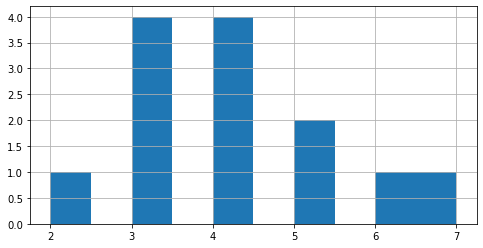

In [32]:
data_number_of_devices = data_basic_type_of_devices.apply(len)
print_stats(data_number_of_devices)

--- Statistics ----


count    13.000000
mean      4.076923
std       1.382120
min       2.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       7.000000
Name: Number of Devices, dtype: float64



--- Counting Unique Values ----


3    4
4    4
5    2
6    1
7    1
2    1
Name: Number of Devices, dtype: int64



--- Basic Histogram ----


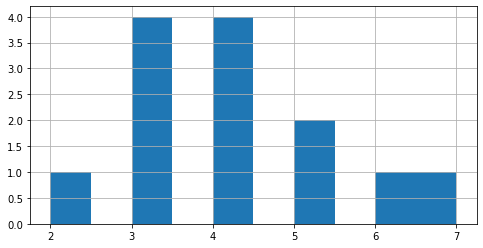

Population Standard Deviation:
1.3278981924332363


In [33]:
data_basic_multiple_devices = data_basic['Number of Devices']
print_stats(data_basic_multiple_devices)
print('Population Standard Deviation:')
print(data_basic_multiple_devices.std(ddof=0))

## SUS

#### Questions

1. I think that I would like to use this system frequently.
2. I found the system unnecessarily complex.
3. I thought the system was easy to use.
4. I think that I would need the support of a technical person to be able to use this system.
5. I found the various functions in this system were well integrated.
6. I thought there was too much inconsistency in this system.
7. I would imagine that most people would learn to use this system very quickly.
8. I found the system very cumbersome to use.
9. I felt very confident using the system.
10. I needed to learn a lot of things before I could get going with this system.

In [34]:
data_sus = calculate_sus(data['SUS'].copy().dropna())
data_sus

,SUS1,SUS2,SUS3,SUS4,SUS5,SUS6,SUS7,SUS8,SUS9,SUS10,Score,Score 100
0,5,6,6,6,6,6,6,6,5,6,58,96.666667
1,6,6,6,6,6,6,6,6,6,6,60,100.000000
2,3,5,5,6,5,5,5,6,5,6,51,85.000000
3,5,6,6,3,5,6,6,6,6,5,54,90.000000
4,6,5,6,4,6,6,4,6,5,6,54,90.000000
5,4,4,5,6,5,5,6,6,6,6,53,88.333333
6,5,5,6,5,5,6,5,6,6,5,54,90.000000
7,6,6,6,6,6,6,5,6,6,6,59,98.333333
8,4,4,5,5,4,5,4,5,5,1,42,70.000000
9,4,6,6,6,5,6,4,5,6,6,54,90.000000


#### Mean Score 100

In [35]:
print(data_sus['Score 100'].mean())

87.6923076923077


#### General Stats

In [36]:
data_sus.describe()
#print_stats(data_sus)

,SUS1,SUS2,SUS3,SUS4,SUS5,SUS6,SUS7,SUS8,SUS9,SUS10,Score,Score 100
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,4.769231,5.153846,5.461538,5.000000,5.307692,5.615385,4.923077,5.692308,5.461538,5.230769,52.615385,87.692308
std,1.091928,0.987096,0.877058,1.527525,0.630425,0.506370,0.954074,0.480384,0.877058,1.535895,7.205767,12.009612
min,3.000000,3.000000,3.000000,1.000000,4.000000,5.000000,3.000000,5.000000,3.000000,1.000000,34.000000,56.666667
25%,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,5.000000,53.000000,88.333333
50%,5.000000,5.000000,6.000000,6.000000,5.000000,6.000000,5.000000,6.000000,6.000000,6.000000,54.000000,90.000000
75%,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,58.000000,96.666667
max,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,60.000000,100.000000


#### Confidence Interval

In [37]:
confidence_interval_t(data_sus['Score 100'])

(80.4349720746924, 94.94964330992299)

#### Per-question Stats

In [38]:
##Uncomment if you need these stats
#for column in data_sus:
    #print_stats(data_sus[column])

## Domain Specific Questions

In [39]:
data_domain_specific = data['Domain Specific']
#data_domain_specific

--- Statistics ----


,DS1,DS2,DS3,DS4,DS5,DS6,DS7,DS8,DS9
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.0,13.000000
mean,5.692308,6.230769,6.153846,6.153846,6.307692,6.307692,6.153846,7.0,6.769231
std,1.548366,0.926809,1.143544,0.800641,0.751068,0.854850,1.405119,0.0,0.438529
min,2.000000,4.000000,4.000000,5.000000,5.000000,5.000000,3.000000,7.0,6.000000
25%,5.000000,6.000000,6.000000,6.000000,6.000000,6.000000,5.000000,7.0,7.000000
50%,6.000000,6.000000,7.000000,6.000000,6.000000,7.000000,7.000000,7.0,7.000000
75%,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.0,7.000000
max,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.0,7.000000




--- Counting Unique Values ----


DS1  DS2  DS3  DS4  DS5  DS6  DS7  DS8  DS9
2    7    7    6    7    5    7    7    7      1
4    6    4    6    6    6    3    7    7      1
5    5    7    7    7    7    7    7    7      1
     6    6    5    5    6    7    7    6      1
     7    7    7    5    5    5    7    7      1
                    7    7    7    7    7      1
6    7    5    7    6    7    7    7    7      1
7    4    4    5    6    6    7    7    7      1
     6    6    6    7    7    7    7    7      1
          7    5    6    7    7    7    6      1
               6    7    7    7    7    7      1
     7    6    7    7    7    4    7    7      1
          7    6    6    5    5    7    6      1
dtype: int64



--- Basic Histogram ----


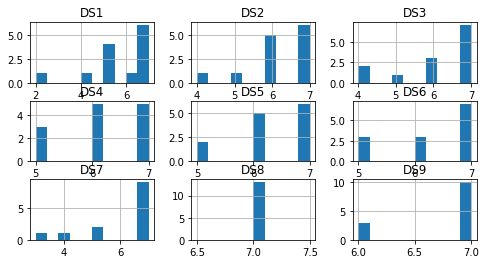

In [40]:
print_stats(data_domain_specific)

### Response Frequency

In [41]:
data_domain_specific_freq_res = (data_domain_specific.apply(pd.value_counts).fillna(0)/data_domain_specific.count()*100).transpose()
data_domain_specific_freq_res

,2,3,4,5,6,7
DS1,7.692308,0.000000,7.692308,30.769231,7.692308,46.153846
DS2,0.000000,0.000000,7.692308,7.692308,38.461538,46.153846
DS3,0.000000,0.000000,15.384615,7.692308,23.076923,53.846154
DS4,0.000000,0.000000,0.000000,23.076923,38.461538,38.461538
DS5,0.000000,0.000000,0.000000,15.384615,38.461538,46.153846
DS6,0.000000,0.000000,0.000000,23.076923,23.076923,53.846154
DS7,0.000000,7.692308,7.692308,15.384615,0.000000,69.230769
DS8,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000
DS9,0.000000,0.000000,0.000000,0.000000,23.076923,76.923077


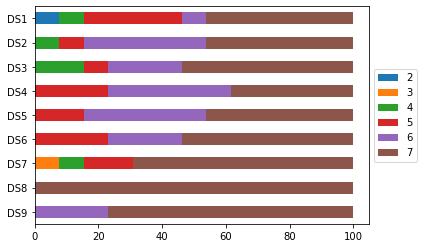

In [42]:
data_domain_specific_freq_res.iloc[::-1].plot.barh(stacked=True).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

In [43]:
for question in data_domain_specific:
    print(question,
          'Median:', data_domain_specific[question].median(), 
          'Mean:', data_domain_specific[question].mean(), 
          'Standard Deviation:', data_domain_specific[question].std(), 
          'Confidence Interval:', confidence_interval_t(data_domain_specific[question]))

DS1 Median: 6.0 Mean: 5.6923076923076925 Standard Deviation: 1.548365556784281 Confidence Interval: (4.756639750739897, 6.627975633875488)
DS2 Median: 6.0 Mean: 6.230769230769231 Standard Deviation: 0.9268086959962983 Confidence Interval: (5.670704341047064, 6.790834120491398)
DS3 Median: 7.0 Mean: 6.153846153846154 Standard Deviation: 1.143543749793731 Confidence Interval: (5.462809581911295, 6.844882725781013)
DS4 Median: 6.0 Mean: 6.153846153846154 Standard Deviation: 0.8006407690254357 Confidence Interval: (5.670023779338468, 6.63766852835384)
DS5 Median: 6.0 Mean: 6.3076923076923075 Standard Deviation: 0.7510676161988107 Confidence Interval: (5.853826689623099, 6.761557925761516)
DS6 Median: 7.0 Mean: 6.3076923076923075 Standard Deviation: 0.8548504142651103 Confidence Interval: (5.79111137242209, 6.824273242962525)
DS7 Median: 7.0 Mean: 6.153846153846154 Standard Deviation: 1.4051188470584877 Confidence Interval: (5.304741332620466, 7.002950975071842)
DS8 Median: 7.0 Mean: 7.0 St

C:\DevelopmentTools\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2098: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
C:\DevelopmentTools\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2099: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


#### Percentage of Users that User Multiple Devices Sometimes or More Often

In [44]:
data_basic_usage_multiple_devices = data_domain_specific['DS1']
(data_basic_usage_multiple_devices[data_basic_usage_multiple_devices >= 5].count()/data_basic_usage_multiple_devices.count())*100

84.61538461538461

## Auxiliary Calculations for JuxtBoard

In [14]:
res = np.array([7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,6,6,6,6,6,6])

In [18]:
res.size

27

In [21]:
np.median(res)

7.0

In [22]:
res.mean()

6.777777777777778

In [25]:
res.std()

0.41573970964154905